# CASE STUDY : BREAST CANCER CLASSIFICATION

Predicting if the cancer diagnosis is benign or malignant based on several observations/features
30 features are used, examples:

  - radius (mean of distances from center to points on the perimeter)
  - texture (standard deviation of gray-scale values)
  - perimeter
  - area
  - smoothness (local variation in radius lengths)
  - compactness (perimeter^2 / area - 1.0)
  - concavity (severity of concave portions of the contour)
  - concave points (number of concave portions of the contour)
  - symmetry 
  - fractal dimension ("coastline approximation" - 1)
Datasets are linearly separable using all 30 input features

Number of Instances: 569
Class Distribution: 212 Malignant, 357 Benign
Target class:
   - Malignant
   - Benign
   
# Breast Cancer : Part 2 : Building Models

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
%config IPCompleter.greedy=True

In [20]:
from sklearn.datasets import load_breast_cancer
data_load = load_breast_cancer()
data = pd.DataFrame(data_load['data'],columns=data_load['feature_names'])
data['target'] = data_load['target']

In [21]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Train Test Split

In [22]:
# for the model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce

In [23]:
cont_vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(data[cont_vars],data['target'],test_size=0.2, random_state=0)

# Basic Model Building

In [25]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [26]:
pipeline = Pipeline([
     ('standard_scale',StandardScaler())
])

In [27]:
X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)

In [28]:
model = SVC()

In [29]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_pred = model.predict(X_test)

In [31]:
accuracy_score(y_pred,y_test)

0.9824561403508771

In [32]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        47
          1       0.97      1.00      0.99        67

avg / total       0.98      0.98      0.98       114



In [33]:
confusion_matrix(y_test,y_pred)

array([[45,  2],
       [ 0, 67]])

#### We got a very good accuracy with a basic model itself. Next we can try to see if it can be improved further.

# Remove correlated features

In [56]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

X_train,X_test,y_train,y_test = train_test_split(data[cont_vars],data['target'],test_size=0.2, random_state=0)

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

corr_features

X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

sel_columns = X_train.columns

pipeline = Pipeline([
    ('standard_scale',StandardScaler())
])

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)

model = SVC(C=10,gamma=0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

correlated features:  10


0.9824561403508771

In [57]:
confusion_matrix(y_test,y_pred)

array([[45,  2],
       [ 0, 67]])

#### No change in performance after removing 10 highly correlated features. We will continue to remove them in future models

# SVC Model Tuning

In [36]:
param_test1 = {
 'C':[0.1,1,10]
}

gsearch1 = GridSearchCV(estimator =  SVC(), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=4, verbose=10)


gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.895652 -   0.0s
[CV] C=1 .............................................................
[CV] .................................. C=0.1, score=0.929825 -   0.0s
[CV] C=1 .............................................................
[CV] .................................. C=0.1, score=0.920354 -   0.0s
[CV] .................................... C=1, score=0.947826 -   0.0s
[CV] C=1 .............................................................
[CV] .................................. C=0.1, score=0.946903 -   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=4)]: Batch computation too fast (0.0386s.) Setting batch_size=10.
[Parallel(n_jobs=4)]: Done   3 out of  12 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   5 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   7 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished


([mean: 0.92318, std: 0.01852, params: {'C': 0.1},
  mean: 0.96274, std: 0.01546, params: {'C': 1},
  mean: 0.96258, std: 0.01578, params: {'C': 10}],
 {'C': 1},
 0.9627366800996334)

In [37]:
param_test1 = {
 'C':[0.1,1,10],
  'gamma': [0.01, 0.1, 1]
}

gsearch1 = GridSearchCV(estimator =  SVC(), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=4, verbose=10)


gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.886957 -   0.0s
[CV] ...................... C=0.1, gamma=0.01, score=0.894737 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.01, score=0.920354 -   0.0s
[CV] ...................... C=0.1, gamma=0.01, score=0.920354 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.904348 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.894737 -   0.0s
[CV] C=0.1, gamma

[Parallel(n_jobs=4)]: Batch computation too fast (0.0356s.) Setting batch_size=10.
[Parallel(n_jobs=4)]: Done   5 out of  36 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:    0.2s finished


([mean: 0.90560, std: 0.01501, params: {'C': 0.1, 'gamma': 0.01},
  mean: 0.89889, std: 0.00467, params: {'C': 0.1, 'gamma': 0.1},
  mean: 0.63737, std: 0.00198, params: {'C': 0.1, 'gamma': 1},
  mean: 0.95831, std: 0.01107, params: {'C': 1, 'gamma': 0.01},
  mean: 0.96050, std: 0.01301, params: {'C': 1, 'gamma': 0.1},
  mean: 0.65056, std: 0.01068, params: {'C': 1, 'gamma': 1},
  mean: 0.97582, std: 0.00729, params: {'C': 10, 'gamma': 0.01},
  mean: 0.95375, std: 0.01812, params: {'C': 10, 'gamma': 0.1},
  mean: 0.66817, std: 0.01342, params: {'C': 10, 'gamma': 1}],
 {'C': 10, 'gamma': 0.01},
 0.9758182971858272)

In [38]:
model = SVC(C=10,gamma=0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)


0.9824561403508771

In [39]:
confusion_matrix(y_test,y_pred)

array([[45,  2],
       [ 0, 67]])

#### We can use parameters C=10,gamma=0.01 as chosen by grid search techniques (though no change is seen in test results)

## XGB Classifier

In [51]:
param_test1 = {
 'learning_rate' : [0.045,0.05,0.055],
  'n_estimators' : [300],
   'max_depth':[5]
}

gsearch1 = GridSearchCV(estimator =  XGBClassifier(
 subsample=0.8,
 colsample_bytree=0.8,
 objective = 'binary:logistic',
 nthread=4,
 seed=0),
                        
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=4, verbose=10)


gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] learning_rate=0.045, max_depth=5, n_estimators=300 ..............
[CV] learning_rate=0.045, max_depth=5, n_estimators=300 ..............
[CV] learning_rate=0.045, max_depth=5, n_estimators=300 ..............
[CV] learning_rate=0.045, max_depth=5, n_estimators=300 ..............


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.045, max_depth=5, n_estimators=300, score=0.938596 -   0.3s
[CV]  learning_rate=0.045, max_depth=5, n_estimators=300, score=0.982301 -   0.2s
[CV] learning_rate=0.05, max_depth=5, n_estimators=300 ...............
[CV] learning_rate=0.05, max_depth=5, n_estimators=300 ...............


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.045, max_depth=5, n_estimators=300, score=0.964602 -   0.4s
[CV] learning_rate=0.05, max_depth=5, n_estimators=300 ...............


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.045, max_depth=5, n_estimators=300, score=0.956522 -   0.5s
[CV] learning_rate=0.05, max_depth=5, n_estimators=300 ...............


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.05, max_depth=5, n_estimators=300, score=0.964602 -   0.1s
[CV] learning_rate=0.055, max_depth=5, n_estimators=300 ..............


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.05, max_depth=5, n_estimators=300, score=0.965217 -   0.4s
[CV] learning_rate=0.055, max_depth=5, n_estimators=300 ..............


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.05, max_depth=5, n_estimators=300, score=0.938596 -   0.4s
[CV] learning_rate=0.055, max_depth=5, n_estimators=300 ..............


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.05, max_depth=5, n_estimators=300, score=0.982301 -   0.3s
[CV] learning_rate=0.055, max_depth=5, n_estimators=300 ..............


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done   7 out of  12 | elapsed:    0.7s remaining:    0.5s
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.055, max_depth=5, n_estimators=300, score=0.965217 -   0.4s


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.055, max_depth=5, n_estimators=300, score=0.929825 -   0.4s


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.055, max_depth=5, n_estimators=300, score=0.982301 -   0.4s


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.055, max_depth=5, n_estimators=300, score=0.973451 -   0.4s


[Parallel(n_jobs=4)]: Done   9 out of  12 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    1.2s finished


([mean: 0.96051, std: 0.01571, params: {'learning_rate': 0.045, 'max_depth': 5, 'n_estimators': 300},
  mean: 0.96268, std: 0.01561, params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300},
  mean: 0.96270, std: 0.01992, params: {'learning_rate': 0.055, 'max_depth': 5, 'n_estimators': 300}],
 {'learning_rate': 0.055, 'max_depth': 5, 'n_estimators': 300},
 0.9626985412743093)

In [59]:
model = XGBClassifier(
 learning_rate= 0.055, max_depth= 5, n_estimators=300,
 subsample=0.8,
 colsample_bytree=0.8,
 objective = 'binary:logistic',
 nthread=4,
 seed=0)

model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.055, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
       subsample=0.8, verbosity=1)

In [60]:
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.956140350877193

In [61]:
confusion_matrix(y_test,y_pred)

array([[44,  3],
       [ 2, 65]])

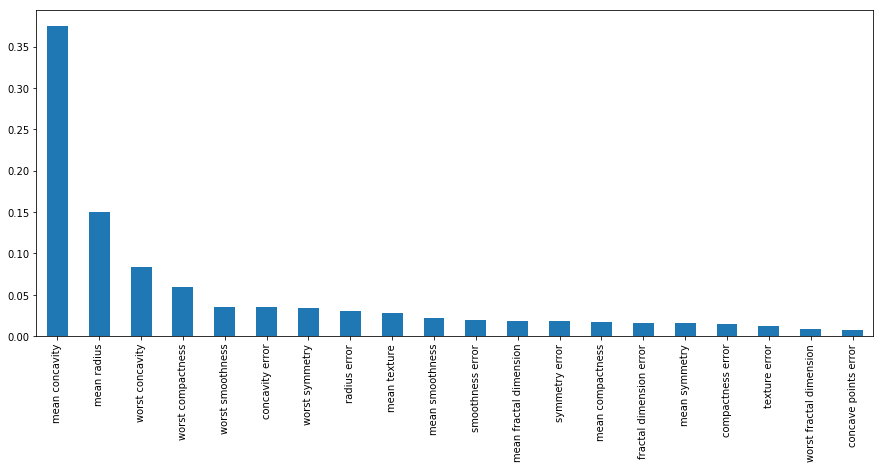

In [62]:
ser = pd.Series(model.feature_importances_)
ser.index = sel_columns
ser = ser.sort_values(ascending=False)
ser.plot.bar(figsize=(15,6))

In [63]:
accuracy_score(model.predict(X_train),y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0

In [64]:
accuracy_score(model.predict(X_test),y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.956140350877193

#### XGB Classifier seems to provide lower performance. Modelling is almost done with SVC.
#### We can quickly try other techniques as summarized in Data Analysis section, namely - outliers, log conversion

## Try with removing outlier 0.1%

In [65]:
from feature_engine.outlier_removers import Winsorizer

In [66]:
Winsorizer()

Winsorizer(distribution='gaussian', fold=3, tail='right', variables=None)

In [70]:
X_train,X_test,y_train,y_test = train_test_split(data[sel_columns],data['target'],test_size=0.2, random_state=0)
pipeline = Pipeline([
    ('standard_scale',StandardScaler())
])

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)

model = SVC(C=10,gamma=0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)




0.9824561403508771

In [76]:
X_train,X_test,y_train,y_test = train_test_split(data[sel_columns],data['target'],test_size=0.2, random_state=0)
pipeline = Pipeline([
    ('outliers',Winsorizer()),
    ('standard_scale',StandardScaler())
])

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)

model = SVC(C=10,gamma=0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9912280701754386

In [77]:
confusion_matrix(y_test,y_pred)

array([[46,  1],
       [ 0, 67]])

#### Winsorization seems to have improved the score, lets check the results with grid search as well

In [80]:
## Without Winsorization

X_train,X_test,y_train,y_test = train_test_split(data[sel_columns],data['target'],test_size=0.2, random_state=0)
pipeline = Pipeline([
    ('standard_scale',StandardScaler())
])

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)


param_test1 = {
 'C':[10],
  'gamma':[0.01]
}

gsearch1 = GridSearchCV(estimator =  SVC(), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=4, verbose=10)


gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.982609 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.964912 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.973451 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.982301 -   0.0s


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0297s.) Setting batch_size=12.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


([mean: 0.97582, std: 0.00729, params: {'C': 10, 'gamma': 0.01}],
 {'C': 10, 'gamma': 0.01},
 0.9758182971858272)

In [81]:
## With Winsorization

X_train,X_test,y_train,y_test = train_test_split(data[sel_columns],data['target'],test_size=0.2, random_state=0)
pipeline = Pipeline([
    ('outliers',Winsorizer()),
    ('standard_scale',StandardScaler())
])

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)


param_test1 = {
 'C':[10],
  'gamma':[0.01]
}

gsearch1 = GridSearchCV(estimator =  SVC(), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=4, verbose=10)


gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_




Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.991304 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.964912 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.982301 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.982301 -   0.0s


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0280s.) Setting batch_size=14.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


([mean: 0.98020, std: 0.00956, params: {'C': 10, 'gamma': 0.01}],
 {'C': 10, 'gamma': 0.01},
 0.9802045996098364)

#### Grid search confirms the improvement with winsorization

## Try converting values to Log

In [84]:
LogCols = (data[sel_columns].min() > 0)

In [85]:
Log_Columns = LogCols[LogCols == True].index.to_list()

In [87]:
Log_Columns # Convert only these columns to log

['mean radius',
 'mean texture',
 'mean smoothness',
 'mean compactness',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'smoothness error',
 'compactness error',
 'symmetry error',
 'fractal dimension error',
 'worst smoothness',
 'worst compactness',
 'worst symmetry',
 'worst fractal dimension']

In [91]:
data1=data.copy() # Perform convertion on a copy
data1[Log_Columns] = np.log(data1[Log_Columns])

X_train,X_test,y_train,y_test = train_test_split(data1[sel_columns],data1['target'],test_size=0.2, random_state=0)


pipeline = Pipeline([
    ('outliers',Winsorizer()),
    ('standard_scale',StandardScaler())
])

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)

model = SVC(C=10,gamma=0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)





0.9912280701754386

#### No improvement seen with log conversion, lets confirm with grid search as well

In [92]:
## Without Log conversion

X_train,X_test,y_train,y_test = train_test_split(data[sel_columns],data['target'],test_size=0.2, random_state=0)
pipeline = Pipeline([
    ('outliers',Winsorizer()),
    ('standard_scale',StandardScaler())
])

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)


param_test1 = {
 'C':[10],
  'gamma':[0.01]
}

gsearch1 = GridSearchCV(estimator =  SVC(), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=4, verbose=10)


gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.991304 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.964912 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.982301 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.982301 -   0.0s


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0262s.) Setting batch_size=14.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


([mean: 0.98020, std: 0.00956, params: {'C': 10, 'gamma': 0.01}],
 {'C': 10, 'gamma': 0.01},
 0.9802045996098364)

In [94]:
## With Log conversion

X_train,X_test,y_train,y_test = train_test_split(data1[sel_columns],data['target'],test_size=0.2, random_state=0)

pipeline = Pipeline([
    ('outliers',Winsorizer()),
    ('standard_scale',StandardScaler())
])

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)


param_test1 = {
 'C':[10],
  'gamma':[0.01]
}

gsearch1 = GridSearchCV(estimator =  SVC(), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=4, verbose=10)


gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.982609 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.947368 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.973451 -   0.0s
[CV] ....................... C=10, gamma=0.01, score=0.982301 -   0.0s


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0243s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


([mean: 0.97143, std: 0.01437, params: {'C': 10, 'gamma': 0.01}],
 {'C': 10, 'gamma': 0.01},
 0.9714323322735464)

#### Overall score seems to have reduced. Hence we wont use Log transformation

# Final Model and CV Score

In [101]:
X_train,X_test,y_train,y_test = train_test_split(data[sel_columns],data['target'],test_size=0.2, random_state=0)
pipeline = Pipeline([
    ('outliers',Winsorizer()),
    ('standard_scale',StandardScaler())
])

X_train = pipeline.fit_transform(X_train,y_train)
X_test = pipeline.transform(X_test)

model = SVC(C=10,gamma=0.01)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9912280701754386